In [46]:
import pandas as pd

df=pd.read_csv("C:\\Users\\sadin\\OneDrive\\Desktop\\booking_cancellation\\data\\hotel_bookings.csv")

### Data Preprocessing

In [47]:
df = df.drop(['company'], axis=1) #due to 94%-95% missing values

In [48]:
df["agent"].nunique() # high cardinality column - many unique values
                        #can leads to overfitting

333

In [49]:
(df["agent"].value_counts()==1).sum() # there 50 unique agent IDs out of 333

50

In [50]:
df = df.drop(['agent'], axis=1) #dropping agent column

In [51]:
df = df.drop(['reservation_status_date'], axis=1) #no important information is there

In [52]:
#summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,119390.0,59694.500000,34465.068657,0.00,29847.25,59694.500,89541.75,119389.0
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.00,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.00,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.00,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.00,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.00,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.00,10.0


In [53]:
# informations from above table.
# min value of adults column is 0 which against hotel policies. Might be a data entry issue.
# min adr is negative. adr cannot be a negative value

In [54]:
# Remove rows with 0 adults
df = df[df['adults'] != 0]

In [55]:
# Replace negative adr with median of adr column
df.loc[df['adr'] < 0, 'adr'] = df['adr'].median()

In [56]:
#summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
hotel,118987,2,City Hotel,78940
arrival_date_month,118987,12,August,13829
meal,118987,5,BB,92020
country,118509,177,PRT,48440
market_segment,118987,8,Online TA,56221
distribution_channel,118987,5,TA/TO,97560
reserved_room_type,118987,9,A,85863
assigned_room_type,118987,11,A,73983
deposit_type,118987,3,No Deposit,104238
customer_type,118987,4,Transient,89337


In [57]:
(df[df["reservation_status"] == "Canceled"]["is_canceled"] == 1).all() 

True

In [58]:
(df[df["reservation_status"] == "Check-Out"]["is_canceled"] == 0).all()

True

In [59]:
(df[df["reservation_status"] == "No-Show"]["is_canceled"] == 1).all()

True

In [60]:
df = df.drop(['reservation_status'], axis=1) #reservation_status column directly connect with is_cancelled column(target variable)
                                                #can cause data leakage
                                                # dropped that column

In [61]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    56478
2017    40557
2015    21952
Name: count, dtype: int64

In [62]:
#arrival_date_year has only 3 yrs which does not provide much information. therefore arrival_date_year is dropped.
df = df.drop(['arrival_date_year'], axis=1)

In [63]:
df = df.drop(['index'], axis=1)  # irrelevent column

In [64]:
df['room_mismatch'] = (df['reserved_room_type'] != df['assigned_room_type'])
# Then drop original columns
df = df.drop(columns=['reserved_room_type','assigned_room_type'])

In [65]:
df['room_mismatch'] = df['room_mismatch'].map({True: 1, False: 0}) #making new column

In [66]:
#HANDELING MISSING VALUES IN COUNTRY COLUMN

df["country"].nunique()

177

In [67]:
#0.41% of missing values are there for country column
# Replace missing values with "Unknown"
df['country'] = df['country'].fillna("Unknown")

In [68]:
df['country'].unique() #ISO Alpha-3 country codes

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KN

In [69]:
import pycountry
import pycountry_convert as pc

# Convert 3-letter code to country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return "Unknown"

# Convert country name to continent
def get_continent(code):
    country_name = get_country_name(code)
    if country_name == "Unknown":
        return "Unknown"
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return "Unknown"

# Apply to your df
df['continent'] = df['country'].apply(get_continent)
df = df.drop(['country'], axis=1) 

In [70]:
df['continent'] .unique() 

array(['Europe', 'North America', 'Unknown', 'Asia', 'South America',
       'Oceania', 'Africa'], dtype=object)

In [71]:
df['continent'].value_counts()

continent
Europe           107479
Asia               3176
South America      2694
North America      2261
Unknown            1764
Africa             1107
Oceania             506
Name: count, dtype: int64

(array([1.10616e+05, 4.85700e+03, 3.44400e+03, 6.50000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

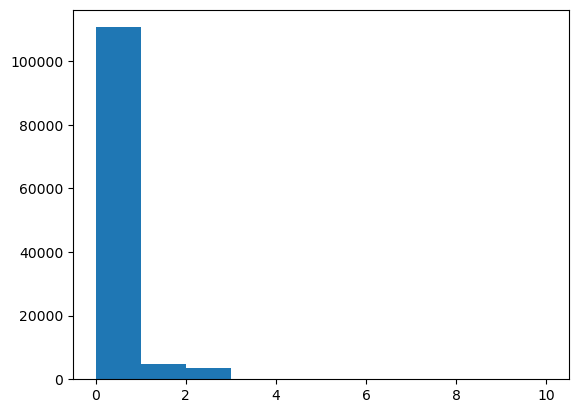

In [72]:
import matplotlib.pyplot as plt
plt.hist(df["children"]) 

In [73]:
df['children']=df['children'].fillna(df['children'].mode()[0]) # skewed distribution. mode imputation is used for children column

In [74]:
df.shape 

(118987, 26)

In [75]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'room_mismatch', 'continent'],
      dtype='object')

### model building

In [76]:
df['total_guests']=df['adults']+df['children']+df['babies']

In [77]:
df['total_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [78]:
df=df.drop(columns=['adults','children','babies','stays_in_weekend_nights','stays_in_week_nights'])

In [79]:
df.shape # newest dataframe

(118987, 23)

In [80]:
# encoding

In [81]:
# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

# One-hot encode the specified columns
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type','continent']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118987 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118987 non-null  int64  
 1   lead_time                       118987 non-null  int64  
 2   arrival_date_month              118987 non-null  int64  
 3   arrival_date_week_number        118987 non-null  int64  
 4   arrival_date_day_of_month       118987 non-null  int64  
 5   is_repeated_guest               118987 non-null  int64  
 6   previous_cancellations          118987 non-null  int64  
 7   previous_bookings_not_canceled  118987 non-null  int64  
 8   booking_changes                 118987 non-null  int64  
 9   days_in_waiting_list            118987 non-null  int64  
 10  adr                             118987 non-null  float64
 11  required_car_parking_spaces     118987 non-null  int64  
 12  total_of_special_requ

In [83]:
df.isnull().sum() #checking nulls

is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
room_mismatch                     0
total_guests                      0
total_stay                        0
hotel_Resort Hotel                0
meal_FB                           0
meal_HB                           0
meal_SC                           0
meal_Undefined                    0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct             0
market_segment_Groups             0
market_segment_Offline TA/TO      0
market_segment_Online TA          0
market_segment_Undefined    

C:\Users\sadin\AppData\Local\Temp\ipykernel_20144\3052879581.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


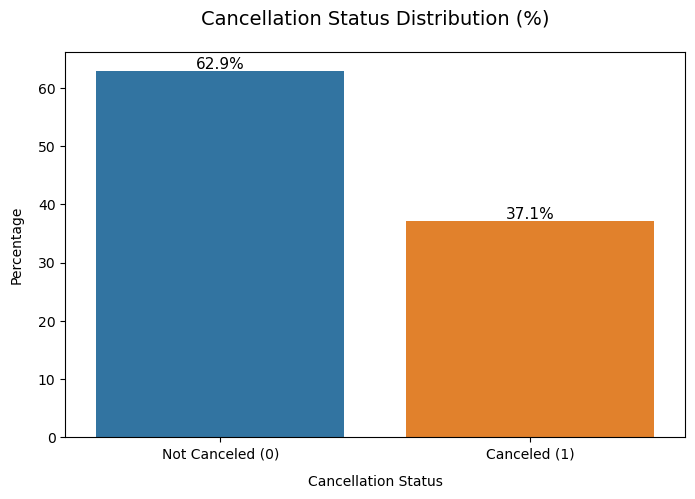

In [84]:
# checking for class imbalance

import seaborn as sns
cancel_percent = df['is_canceled'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=cancel_percent.index, 
    y=cancel_percent.values,
    palette=['#1f77b4', '#ff7f0e']  # Blue=Not Canceled, Orange=Canceled
)

plt.title('Cancellation Status Distribution (%)', pad=20, fontsize=14)
plt.xlabel('Cancellation Status', labelpad=10)
plt.ylabel('Percentage', labelpad=10)
plt.xticks(ticks=[0, 1], labels=['Not Canceled (0)', 'Canceled (1)'])

# Adding percentage labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=11
    )
plt.show()

In [85]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# XGBOOST

In [86]:
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [87]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [88]:


# Define the model
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [250, 350],
    'learning_rate': [0.01, 0.1],
    'max_depth': [7, 8],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [(y_train == 0).sum() / (y_train == 1).sum()]
}

# Performing GridSearch for XGBoost
grid_search = GridSearchCV(estimator=xgb_base, param_grid=param_grid_xgb, 
                          scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters of XGBoost
best_xgb = grid_search.best_estimator_
best_xgb_hyperparams = grid_search.best_params_

# best hyperparameters for XGBoost
print("XGBoost Optimal Hyperparameters:\n", best_xgb_hyperparams)

# Predictions from XGBoost
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# accuracy of XGBoost
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Classification Reports of XGBoost
print("\nClassification Report (Train Data):\n", classification_report(y_train, y_train_pred))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))



Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\sadin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Optimal Hyperparameters:
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 350, 'scale_pos_weight': 1.6971834976765272, 'subsample': 0.8}
Train Accuracy: 0.9036
Test Accuracy: 0.8533

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     59897
           1       0.86      0.89      0.87     35292

    accuracy                           0.90     95189
   macro avg       0.89      0.90      0.90     95189
weighted avg       0.90      0.90      0.90     95189


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     14975
           1       0.79      0.82      0.81      8823

    accuracy                           0.85     23798
   macro avg       0.84      0.85      0.84     23798
weighted avg       0.85      0.85      0.85     23798



### confusion matrix, ROC curve for test data


Confusion Matrix (Test Data):


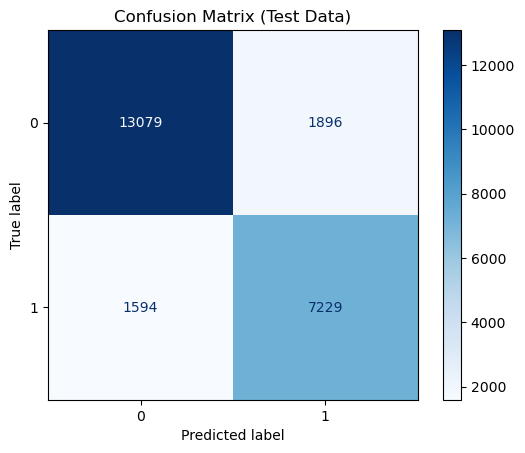


ROC Curve (Test Data):


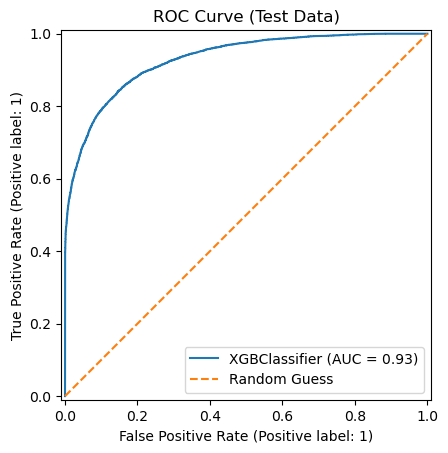


ROC AUC Score (Test Data): 0.9299


In [89]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Test Data
print("\nConfusion Matrix (Test Data):")
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.show()

# ROC Curve for Test Data
print("\nROC Curve (Test Data):")
RocCurveDisplay.from_estimator(best_xgb, X_test, y_test)
plt.title("ROC Curve (Test Data)")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')  # Add diagonal line
plt.legend()
plt.show()

# ROC AUC Score
y_test_proba = best_xgb.predict_proba(X_test)[:, 1]  # Probabilities for class 1
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"\nROC AUC Score (Test Data): {roc_auc:.4f}")

<Figure size 1000x800 with 0 Axes>

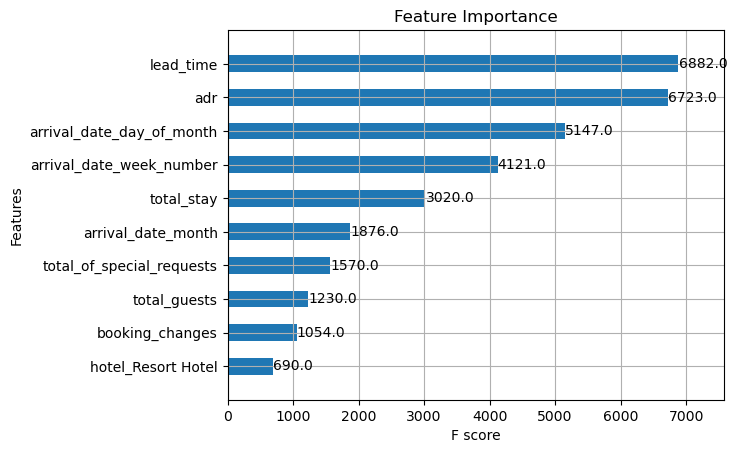

In [90]:
import matplotlib.pyplot as plt

# Plotting feature importance for the best XGBoost model
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_xgb, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Feature Importance')
plt.show()

# Random Forest

In [91]:
# manual hyperparameter tuning is done since grid did not give good recall for Random Forest

#defining the model
rf_tuned = RandomForestClassifier(
    n_estimators=250,        # More trees for stability  
    criterion='gini',        # 'gini' often works better for imbalanced data  
    max_depth=24,            # Slightly shallower to reduce overfitting  
    min_samples_split=4,     # Helps generalization  
    min_samples_leaf=2,      # Avoids very small leaves  
    class_weight={0: 1, 1: 2},  # Adjust class weight to balance recall & precision  
    random_state=0,  
    n_jobs=-1  
)

# Train the model
rf_tuned.fit(X_train, y_train)

# Predictions on train and test sets
y_train_pred = rf_tuned.predict(X_train)
y_test_pred = rf_tuned.predict(X_test)

# Evaluate performance
print("==== Train Data Evaluation ====")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n==== Test Data Evaluation ====")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

==== Train Data Evaluation ====
Train Accuracy: 0.9032031011986679
Train Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     59897
           1       0.85      0.90      0.87     35292

    accuracy                           0.90     95189
   macro avg       0.89      0.90      0.90     95189
weighted avg       0.91      0.90      0.90     95189


==== Test Data Evaluation ====
Test Accuracy: 0.8545676107235902
Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     14975
           1       0.80      0.82      0.81      8823

    accuracy                           0.85     23798
   macro avg       0.84      0.85      0.84     23798
weighted avg       0.86      0.85      0.85     23798




==== Feature Importances ====
                           Feature  Importance
0                        lead_time    0.143573
31         deposit_type_Non Refund    0.141650
11       total_of_special_requests    0.086728
12                   room_mismatch    0.071359
9                              adr    0.069148
5           previous_cancellations    0.046999
10     required_car_parking_spaces    0.046302
2         arrival_date_week_number    0.043256
3        arrival_date_day_of_month    0.042353
14                      total_stay    0.034895
7                  booking_changes    0.031215
25        market_segment_Online TA    0.027566
1               arrival_date_month    0.027185
34         customer_type_Transient    0.026660
24    market_segment_Offline TA/TO    0.019704
35   customer_type_Transient-Party    0.018532
23           market_segment_Groups    0.017795
13                    total_guests    0.015547
29      distribution_channel_TA/TO    0.014542
15              hotel_Resort 

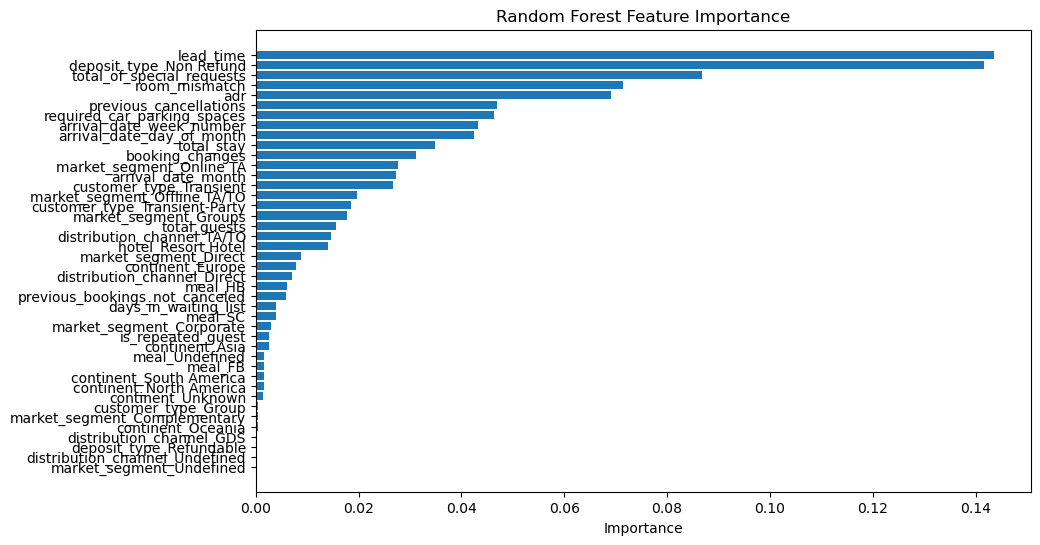

In [93]:
feature_names = X_train.columns  

# Get feature importances
importances = rf_tuned.feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances")
print(feature_importance_df)

# Optional: Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()



Confusion Matrix (Test Data):


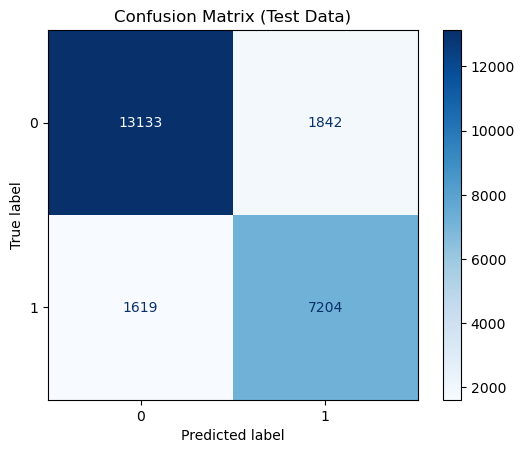


ROC Curve (Test Data):


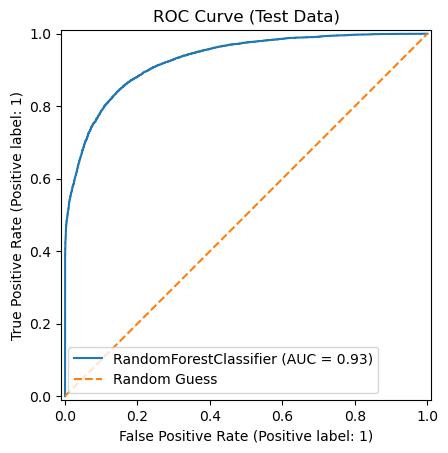


ROC AUC Score (Test Data): 0.9289


In [92]:
import numpy as np

print("\nConfusion Matrix (Test Data):")
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.show()

# ROC Curve for Test Data
print("\nROC Curve (Test Data):")
RocCurveDisplay.from_estimator(rf_tuned, X_test, y_test)
plt.title("ROC Curve (Test Data)")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')  # Add diagonal line
plt.legend()
plt.show()

# ROC AUC Score
y_test_proba = rf_tuned.predict_proba(X_test)[:, 1]  # Probabilities for class 1
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"\nROC AUC Score (Test Data): {roc_auc:.4f}")